In [64]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

In [65]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Total ILI']]
list_data = list(df_hospital['Total ILI'])

In [66]:
list_data = list(df_hospital['Total ILI'])

In [99]:
model = SARIMAX(list_data, order=(1, 1, 0), seasonal_order=(1, 1, 0, 52))
model_fit = model.fit(disp=False)

In [100]:
# make prediction
future = 52
# predictions = model_fit.predict(len(list_data), len(list_data) + future)
predictions = model_fit.forecast(future)
print(predictions)
# future_weeks = list(range(len(list_data) - 1, len(list_data) + future))
future_weeks = list(range(len(list_data) - 1, len(list_data) + future))
# future_weeks

[34795.29500287 34402.81668856 39001.42630319 39674.93945418
 45632.84742814 54460.85691562 58359.2838103  58791.21523952
 62974.34414329 67643.92480882 78093.92563255 86909.48553104
 94007.45932503 87362.50806323 72330.62174015 59241.15161367
 53791.99569306 50988.83169098 46618.87979359 41589.4533316
 38560.66670957 35036.7249601  32029.9790147  30789.18585929
 29326.37131209 27619.00521937 27026.47593128 26441.11000971
 25453.84336326 24374.81502704 23154.52190084 22430.10610363
 21918.39014003 20972.32253387 20999.34520477 20443.79037201
 20140.65491275 20245.9968619  20463.94848687 21239.24847678
 22102.67103994 23302.97420046 24603.51937905 25516.15802262
 26569.21285812 27007.54184793 33331.67741228 34193.85480148
 35719.97411879 37704.33858622 39016.29346137 41012.56425269]


In [101]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

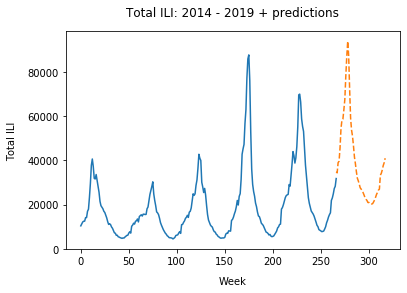

In [102]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [71]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  267
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -1991.122
Date:                            Mon, 09 Dec 2019   AIC                           3988.244
Time:                                    14:14:38   BIC                           3998.342
Sample:                                         0   HQIC                          3992.325
                                            - 267                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6086      0.039     15.590      0.000       0.532       0.685
ar.S.L52      -0.5839      0.044    -13.349      0.000      -0.670      -0.498
sigma2      6.959e+06   3.91e+05     17.821      0.000    6.19e+06    7.72e+06
===================================================================================
Ljung-Box (Q):                       39.14   Jarque-Bera (JB):               855.52
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -1.30
Prob(H) (two-sided):                  0.99   Kurtosis:                        12.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""